# Importing Kinematic modelling into GemPy using pynoddy

In [1]:
import sys, os
# Path to development gempy
sys.path.append('../../..')

# Path to development pynoddy
sys.path.append('../../../../pynoddy')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pn
# adjust some settings for matplotlib
from matplotlib import rcParams
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
import gempy as gp
import pynoddy
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Loading noddy model

In [2]:
import pynoddy.history
pynoddy.history.__file__

'../../../../pynoddy/pynoddy/history.py'

In [3]:
#reload(pynoddy.history)

his = pynoddy.history.NoddyHistory(url = \
            "http://tectonique.net/asg/ch2/ch2_2/ch2_2_1/his/normal.his")

his.determine_model_stratigraphy()

In [4]:
his.change_cube_size(500)

In [5]:
history_name = "fold_thrust.his"
his.write_history(history_name)

In [6]:
output = "fold_thrust_out"
pynoddy.compute_model(history_name, output, sim_type='TOPOLOGY')

''

In [7]:
import pynoddy.output
# load and visualise model
h_out = pynoddy.output.NoddyOutput(output)

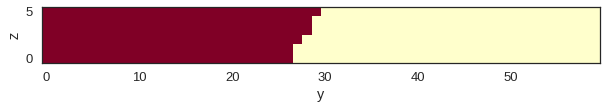

In [8]:
# his.determine_model_stratigraphy()
h_out.plot_section('x', 
                   layer_labels = his.model_stratigraphy, 
                   colorbar_orientation = 'horizontal', 
                   colorbar=False,
                   title = '',
#                   savefig=True, fig_filename = 'fold_thrust_NS_section.eps',
                   cmap = 'YlOrRd')

In [11]:
np.save('noddy_block', h_out.block)

### Finding interfaces

In [23]:
def find_interfaces_block(block):
    A = block > 1
    # Matrix shifting along axis
    B  = A # 
    x_shift = B[:-1,:,:] ^ B[1:,:,:]

    # Matrix shifting along axis
    y_shift = B[:,:-1,:] ^ B[:,1:,:]

    # Matrix shifting along axis
    z_shift = B[:,:,:-1] ^ B[:,:,1:]
    
    final_bool = np.zeros_like(block, dtype=bool)
    final_bool[1:,1:,1:] = x_shift[:, 1:, 1:] ^ y_shift[1:, :, 1:] ^ z_shift[1:, 1:, :]
    
    return final_bool

In [24]:
a = find_interfaces_block(h_out.block)


In [25]:
a[0, :,:].sum()

0

In [26]:
h_out.block[a]

array([ 1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,
        1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,
        1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,
        2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,
        2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,
        1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
        1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,
        1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,
        1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1

In [27]:
extent = h_out.extent_x, h_out.extent_y, h_out.extent_z

In [28]:
cs = h_out.delx

In [29]:
extent[0]/cs

60.0

In [30]:
sys.path.append("../..")
import gempy as gp

In [92]:
# initialize geo_data object
geo_data = gp.create_data([0, extent[0], 
                           0, extent[1], 
                           0, extent[2]],
                          resolution=[int(extent[0]/cs), 
                                      int(extent[1]/cs), 
                                      int(extent[2]/cs)])

In [93]:
b = np.ravel(a)

In [94]:
g = geo_data.grid.values[b]



In [95]:
r = np.random.randint(g.shape[0], size=(20))

In [96]:
p = pn.DataFrame(columns=['X', 'Y', 'Z', 'formation', 'series', 'formation_number', 
         'order_series', 'isFault'])

In [97]:
p

,X,Y,Z,formation,series,formation_number,order_series,isFault


In [98]:
p[['X', 'Y', 'Z']] = pn.DataFrame(g[r])

In [99]:
p['formation'] = 'layer'
p['series'] = 'Default_series'
p['formation_number'] = 1
p['order_series'] = 1

In [100]:
gp.set_interfaces(geo_data, p)

ValueError: cannot convert float NaN to integer

In [68]:
geo_data.interfaces.sort_values(by=['X', 'Y', 'Z'], inplace=True)

In [69]:
geo_data.interfaces.reset_index(drop=True, inplace= True)

In [70]:
gp.set_orientation_from_interfaces(geo_data, [5,6,7,8,9,10,11,12])

,X,Y,Z,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,formation_number,order_series,isFault,annotations,formation_value
0,9500.0,14437.5,1647.5,0.014194,-0.842213,0.538958,57.387299,179.034455,1.0,layer,Default series,1,1,False,"${\bf{x}}_{\beta \,{\bf{1}},0}$",1


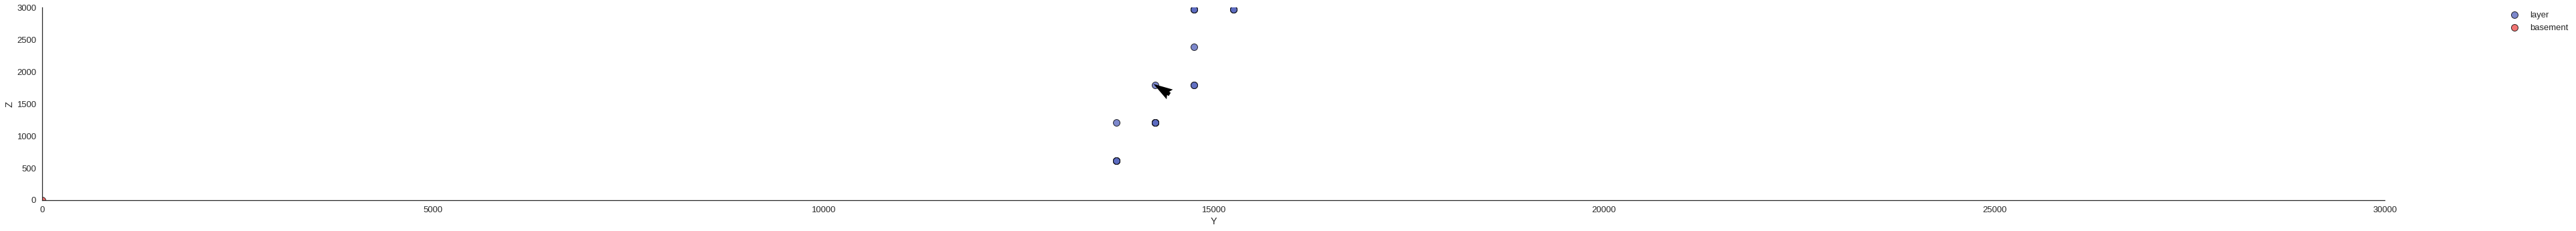

In [71]:
gp.plotting.plot_data(geo_data, direction='x')

In [49]:
interp_data = gp.InterpolatorData(geo_data, compile_theano=True)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32
Number of faults:  0


In [72]:
interp_data.update_interpolator(geo_data)

In [73]:
lith, fault = gp.compute_model(interp_data)

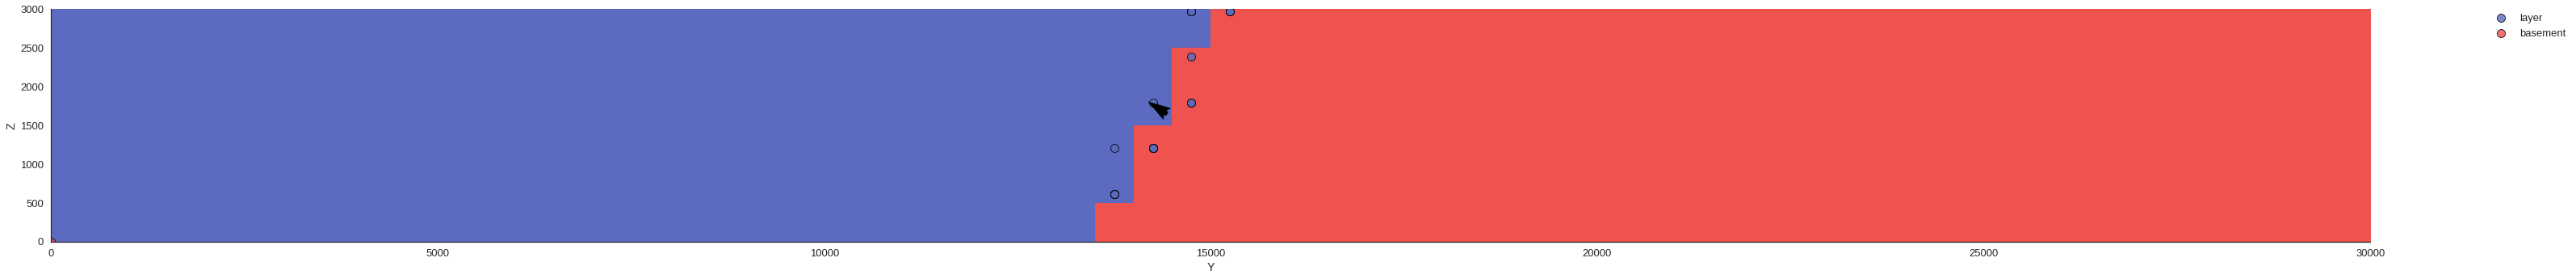

In [74]:
gp.plotting.plot_section(geo_data, lith[0], 30, direction='x', plot_data= True)

In [75]:
ver, sim = gp.get_surfaces(interp_data, lith[1], None)
gp.plotting.plot_surfaces_3D_real_time(geo_data, interp_data, ver, sim)

closing vtk
